In [18]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
from matplotlib.patches import FancyArrowPatch,Rectangle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import proj3d

plt.rcParams["figure.figsize"] = [10, 10]

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,linspace,meshgrid,array,arange

from scipy.integrate import quad,dblquad

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


## Announcements

  - No class Thursday. 
  - Review session tonight. See Courseworks for link. 
  - Exam 2 11/12
    - Through HW9
    - Practice materials in the "practice_materials" folder on Courseworks.
    - [Screencast with old exam here](https://youtu.be/d2n3ytcJ5j4).
    
    

<p style="padding-bottom:40%;"> </p>

# Lecture 17

  - Objectives
    - Multiple Integration
      - Masses, moments, and distributions
      - Integration Review
    - Midterm 2 review.
  - Resources
    - Content
      - Stewart: §15.5–7
      - New Strang:  
        - [§5.4](https://openstax.org/books/calculus-volume-3/pages/5-4-triple-integrals) Some good practice on changing order of integration here, Particularly, nos. 203–206, 211, 212, 215–220, 235, 240, though some answers may have errors.
        - [§5.5](https://openstax.org/books/calculus-volume-3/pages/5-5-triple-integrals-in-cylindrical-and-spherical-coordinates)
    - Practice
      - Mooculus: [Cylindrical Coordinates](https://ximera.osu.edu/mooculus/calculus3/commonCoordinates/digInCylindricalCoordinates) [Spherical](https://ximera.osu.edu/mooculus/calculus3/computationsAndInterpretations/digInMassMomentsAndCenterOfMass)
    - Extras
      - CalcBLUE: [Cylindrical Coordinates](https://www.youtube.com/watch?v=YIi7muLgI9U&list=PL8erL0pXF3JaJdUcmc_PeGV-vG5z87BkD&index=90) [Spherical Coordinates](https://www.youtube.com/watch?v=Zc8uCT-e5KI&list=PL8erL0pXF3JaJdUcmc_PeGV-vG5z87BkD&index=98) 

<p style="padding-bottom:40%;"> </p>

# Applications of Integration

The basic principal behind applying integration is that the desired quantity, the <i>desideratum</i>, is obtained by integrating its <i>elements</i>. Put succinctly,

$$\spadesuit = \int d\spadesuit$$

<p style="padding-bottom:40%;"> </p>

## A Word on Density

"Density" often stands in for mass density which has units of mass/volume, like $\frac{{\rm g}}{{\rm ml}}$. 

But think of it more generally as $$\frac{\rm stuff}{\rm unit\ of\ measure}$$

Further, these can vary continuously throughout a medium or space. Thus, we integrate to find the total amount of "stuff". 

<p style="padding-bottom:40%;"> </p>

### Examples

  - Resistivity $\rho(x)$ along a wire, $\frac{\Omega}{{\rm m}}$. $$\Omega = \int_0^\ell \rho(x)\, dx$$

  - Probability density function $\rho(x,y)$ of two random variables. $$P(E) = \iint_E \rho(x,y)\, dA$$

  - Concentration of chemicals, like $[\text{H}_2\text{CO}_3] = \rho(x,y,z)$. $$\text{total carbonic acid} = \iiint_D \rho(x,y,z)\,dV$$

<p style="padding-bottom:40%;"> </p>

## Masses and Moments

Consider a two mass system in one dimension. That is suppose a mass $m_1$ is at position $x_1$ and mass $m_2$ is at position $x_2$.

The total mass is of course

$$M = m_1 + m_2.$$

The **center of mass** is the point $\bar x$ that balances the torque. That is,

$$m_1(x_1 - \bar x) + m_2(x_2 - \bar x) =0$$

$$\bar x = \frac{m_1x_1 + m_2x_2}{m_1 + m_2}$$

$$ = \frac{m_1}{M}x_1 + \frac{m_2}{M}x_2$$

<p style="padding-bottom:40%;"> </p>

## Masses and Moments

<img src="https://culinarylore.com/wp-content/uploads/2014/02/waiter-drinks-tray.jpg" width="30%" style="float: right">
                                                                                                                      
Let consider a planar region $\mathcal D$ (a "lamina") with continuously varying density (mass per unit area) $\rho(x,y)$. The the total mass is given by $$M = \iint_D \rho(x,y)\,dA$$ 

The **center of mass** $(\bar{x},\bar y)$ is the "(weighted) average position" of the mass in the object. 
$$(\bar{x},\bar y) = \left(\frac{M_y}{M},\frac{M_x}{M}\right)$$ 

where 

$$ M_y = \iint_\mathcal D x \rho(x,y)\,dA$$ 

$$ M_x = \iint_\mathcal D y \rho(x,y)\,dA$$

are the **first moments** relative to the $y$- and $x$-axes, respectively.

## Center of mass

More concisely, 

$$(\bar{x},\bar y) = \left(\frac{\iint_\mathcal D x \rho(x,y)\,dA}{\iint_\mathcal D \rho(x,y)\,dA},\frac{\iint_\mathcal D y \rho(x,y)\,dA}{\iint_\mathcal D  \rho(x,y)\,dA}\right)$$ 


<p style="padding-bottom:40%;"> </p>

### Example

Find the center of mass of the unit square $[0,1]\times [0,1]$ whose density is given by $\rho(x,y) = x+y$ 

In [8]:
@interact
def _(show=False):
    x = y = np.linspace(0,1,100)
    x,y = np.meshgrid(x,y)

    plt.figure(figsize=(8,8))
    plt.pcolormesh(x,y,x+y,cmap='rainbow')
    plt.xlim([0,1.5])
    plt.ylim([0,1.5])
    if show:
        plt.scatter([7/12],[7/12])


interactive(children=(Checkbox(value=False, description='show'), Output()), _dom_classes=('widget-interact',))

In [ ]:
M = dblquad(lambda y,x: x+y,0,1,0,1)[0]
M

In [23]:
ybar = 1/M*dblquad(lambda y,x: (x+y)*y,0,1,0,1)[0]
ybar

0.5833333333333333

<p style="padding-bottom:40%;"> </p>

## Moment(s) of Inertia

The **[moment of inertia](https://drew.youngren.nyc/3Demos/moments/index.html)** $I$ of a massive body is a measure of its "resistance to rotation" about a given axis. 

Angular momentum is  $L=I\omega$, the product of the moment of inertia and the angular velocity, and is a conserved quantity in a closed system.

![Figure skater spinning](http://giphygifs.s3.amazonaws.com/media/RmuN3xF9sBpL2/giphy.gif)

The figure skater pulls her body in to reduce her moment of intertia. As angular momentum is conserved, she spins faster.

### Formula

$I$ is a measurement of how far the mass is spread from the axis. It is the second moment of the density distribution. 

If we take a body $\mathcal D$ in the plane with area density $\rho(x,y)$, and consider it rotating about the origin, then

$$ I = \iint_\mathcal D (x^2+y^2)\rho(x,y)\,dA $$

that is, the distance to the axis squared, weighted by mass. 


<p style="padding-bottom:40%;"> </p>

#### Example

Let's compute the moment of inertia of the square above about:
  - the origin
  - the $y$-axis

In [24]:
Iz = dblquad(lambda y,x: (x**2 + y**2)*(x + y),0,1,0,1)[0]

In [25]:
Iy = dblquad(lambda y,x: (x**2)*(x + y),0,1,0,1)[0]

In [26]:
Iz

0.8333333333333334

In [27]:
Iy

0.41666666666666663

In [19]:
@interact(t=(0.,2*pi,pi/10))
def _(t=0):
    x = linspace(0,1)
    x,y = meshgrid(x,x)
    plt.figure(figsize=(6,6))
    ax = plt.gca(projection='3d')
    ax.plot_surface(x*cos(t) - y*sin(t),x*sin(t) + y*cos(t),0*x)
    ax.plot_surface(x*cos(2*t),y,x*sin(2*t))
    ax.plot([0,0],[-1,1],[0,0],'--k')
    ax.plot([0,0],[0,0],[-1,1],'--k')
    for c in 'xyz':
        getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    

interactive(children=(FloatSlider(value=0.0, description='t', max=6.283185307179586, step=0.3141592653589793),…

<p style="padding-bottom:40%;"> </p>

# Probability

Two (real) random variables $X$ and $Y$ have a joint probability density function $\rho(x,y)$. This is simply a function on the plane with $\rho(x,y) \geq 0$ and 

$$\iint_{\RR^2} \rho(x,y)\,dA = 1.$$

An **event** $E \subset \RR^2$ is just a subset of the sample space, and its probability is 

$$P(E) = \iint_E \rho(x,y)\,dA$$.

<p style="padding-bottom:40%;"> </p>

## Example

What is the probability that 2 numbers randomly chosen between 0 and 1 have a product greater than $\frac12$?

<p style="padding-bottom:40%;"> </p>

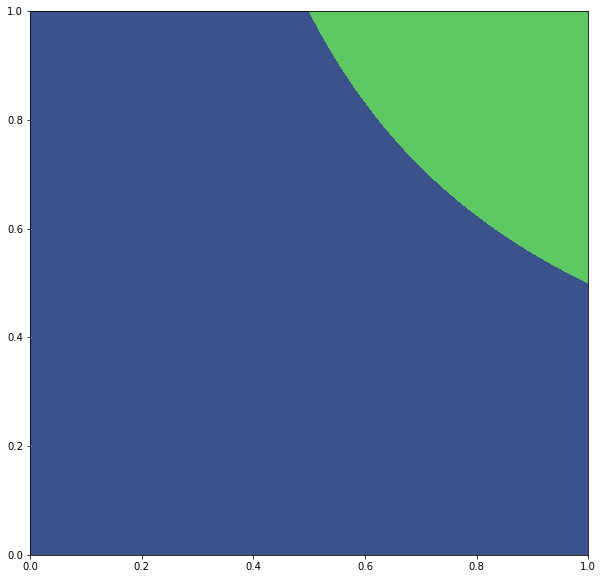

In [15]:
x = y = np.linspace(0,1,50)
x,y = np.meshgrid(x,y)
plt.contourf(x,y,x*y ,levels=[0,1/2,1]);

In [16]:
dblquad(lambda y,x: 1, 1/2,1,lambda x: 1/(2*x),1)[0]

0.15342640972002736

In [17]:
1/2-log(2)/2

0.15342640972002736

<p style="padding-bottom:40%;"> </p>

## The Moments 

Moment measurements have analogous meaning in the probability context.

The "center of mass" is in fact the **expected value** of the variables.

$$(\bar{x},\bar{y}) = \left( \iint_{\RR^2} x \rho(x,y)\,dA,\iint_{\RR^2} y \rho(x,y)\,dA\right) $$

The second moments (relative to this center) give the **variances** of the respected variables. 

$$(\sigma_x^2,\sigma_{y}^2) = \left( \iint_{\RR^2} (x-\bar{x})^2 \rho(x,y)\,dA,\iint_{\RR^2} (y-\bar{y})^2 \rho(x,y)\,dA\right) $$

The list goes on 

  - mixed moments $\to$ covariance
  - 3rd moments $\to$ skewedness
  - 4th moments $\to$ kurtosis
  - $\ldots$

<p style="padding-bottom:40%;"> </p>

### Examples

Find the moments of inertia relative to the central axes of the following solids (with constant density) in terms of their mass:
  - a sphere with radius $R$
  - a cylinder with radius $R$ and height $h$
  - a cone with radius $R$ and height $h$
  - **bonus** a hollow sphere of radius $R$

<p style="padding-bottom:40%;"> </p>

# Exam 2 Review

  - Administered via Gradescope.
  - Not cumulative in a direct sense (cumulative as necessary).
  - Topics
    - Chain Rule
    - Gradients
      - Definition
      - Properties
      - Directional Derivative
    - Optimization
      - Critical Points
      - Classifying critical points
      - Unconstrained optimization
      - Lagrange Multipliers
    - Integration
      - Riemann sums
      - Double integrals
      - Fubini's Theorem
      - Polar Coordinates
      - Applications
        - Mass/density
        - Center of mass/centroids
        - Moments of inertia
        - Expected value/probability
      - Triple integrals
      - Cylindrical coordinates
      - Spherical Coordinates

### Exercise

Let $E$ be the region in $\RR^3$ defined by
\begin{align*}
& 0\leq x^2+y^2+z^2\leq 1,\\
& x\geq0.
\end{align*}

Which of the following integrals must be $0$? (Do **not** compute them. Use other means.)

  1. $\displaystyle\iiint_E \sin(x) dV$.
  1.  $\displaystyle\iiint_E xy^2z^2 dV$. 
  1.  $\displaystyle\iiint_E x^2yz dV$.
  1.  $\displaystyle\iiint_E \cos(y) dV$. 
  1.  $\displaystyle\iiint_E (1-z) dV$. 


Which region in $\RR^3$ described below has the smallest volume?


  1. All cylindrical coordinates $r,\theta,z$ are between 0 and 1. 
  1. All rectangular coordinates $x,y,z$ are between 0 and 1. 
  1. All spherical coordinates $\rho,\theta,\phi$ are between 0 and 1.
  1. All of the above have equal volume. 
  1. Don't choose this.
